In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssl
import certifi
import urllib.request
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

# Data Analysis and Pre-processing

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(path, context=ssl_context) as response:
    data = pd.read_csv(response)
data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


<Axes: >

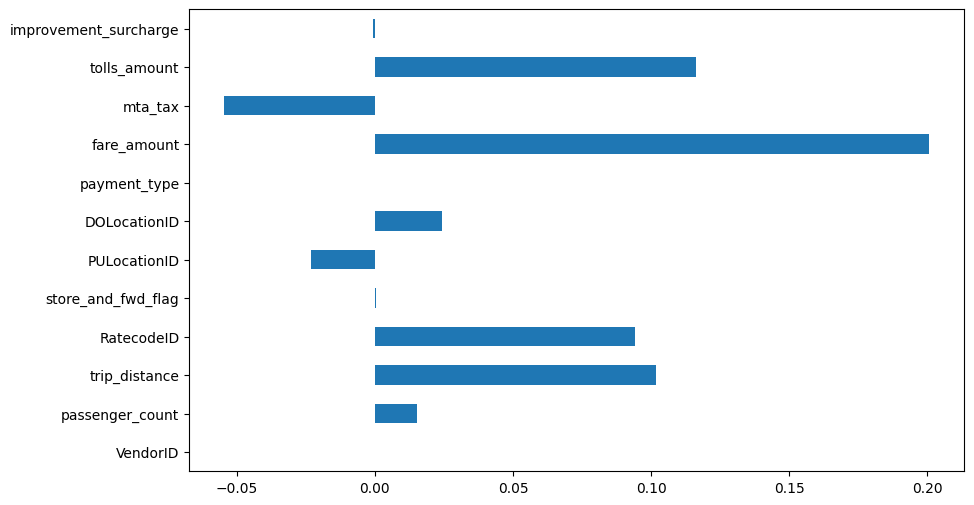

In [5]:
# To understand the dataset a little better, let us plot the correlation of the target variable against the input variables.
correlation_values = data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

Apply normalization to the input features.

In [8]:
# extract the labels from the dataframe
y = data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

In [11]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

In [12]:
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# Evaluation

To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination. We will also evaluate the Mean Squared Error $(MSE)$ of the regression output with respect to the test set target values. High $R^2$ and low $MSE$ values are expected from a good regression model.


In [13]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028


# Questions

Q1. What if we change the max_depth to 12? How would the $MSE$ and $R^2$ be affected? 


MSE is noted to be increased by increasing the max_depth of the tree. This may be because of the model having excessive parameters due to which it overfits to the training data, making the performance on the testing data poorer. Another important observation would be that the model gives a <b>negative</b> value of $R^2$. This again indicates that the prediction model created does a very poor job of predicting the values on a test set.

In [14]:
dt_reg_12 = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=12, 
                               random_state=35)
dt_reg_12.fit(X_train, y_train)
y_pred = dt_reg_12.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg_12.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 26.459
R^2 score : -0.047


Q2. Identify the top 3 features with the most effect on the tip_amount.

In [19]:
correlation_values = data.corr()['tip_amount'].drop('tip_amount')
print(correlation_values)
print("\nTop 3 features with highest correlation to 'tip_amount':")
abs(correlation_values).sort_values(ascending=False)[:3]

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

Top 3 features with highest correlation to 'tip_amount':


fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

Q3. Since we identified 4 features which are not correlated with the target variable, try removing these variables from the input set and see the effect on the $MSE$ and $R^2$ value.


In [27]:
# Data processing
raw_data = data.drop(['tip_amount', 'payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
X = raw_data.values
X = normalize(X, axis=1, norm='l1', copy=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training
dt_reg.fit(X_train, y_train)

# Evaluation
y_pred = dt_reg.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.709
R^2 score : 0.022


Q4. Check the effect of **decreasing** the `max_depth` parameter to 4 on the $MSE$ and $R^2$ values.

In [32]:
# Data processing
raw_data = data.drop(['tip_amount', 'payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
X = raw_data.values
X = normalize(X, axis=1, norm='l1', copy=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training
dt_reg_4 = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=4, 
                               random_state=35)
dt_reg_4.fit(X_train, y_train)

# Evaluation
y_pred = dt_reg_4.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg_4.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.468
R^2 score : 0.031
